In [1]:
import numpy as np
import matplotlib.pyplot as plt

#get the paths to be able to import functions and csv files
%cd /Users/ronja/Documents/GitHub/neural-fields

import sys
sys.path.append('/Users/ronja/Documents/GitHub/neural-fields/py')
csv_path = '/Users/ronja/Documents/GitHub/neural-fields/csv'
sys.path.append(csv_path)

from params import setParams
from runFuncs import run_activity, run_fixedpoints, run_violation

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

/Users/ronja/Documents/GitHub/neural-fields
1d Model initialised.


In [4]:
ee = 0.47
ii = 0.01

params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 4*1000, 'mu_a': 0.4, 'beta_a': 10, 
        'seed': True, 'seed_amp': 0.1}#, 'length': 10, 'n': 14}

params_wo_adaps = setParams(params)
params_wo_adaps['b'] = 0
fps1, stab1 = run_fixedpoints(params_wo_adaps)
vio1 = run_violation(params, fps[0])

print('without adaptation: fixed points %s w/o adaps' %str(fps1))
print('with (mass) stability %s w/o adaps'  %str(stab1))
print('and continuum-stability for down state %s' %str(vio1))

params = setParams(params)
fps, stab = run_fixedpoints(params)
vio = run_violation(params, fps[0])
#vio, k0 = 
print('with adaptation: fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))
print('and continuum-stability for down state %s' %str(vio))


without adaptation: fixed points [[0.12533612 0.48447835]
 [0.72613427 0.99946549]
 [0.99487276 0.99999364]] w/o adaps
with (mass) stability [1, 0, 1] w/o adaps
and continuum-stability for down state (1, 1, 0)
with adaptation: fixed points [[0.12140373 0.47685033]
 [0.85251023 0.9999334 ]
 [0.97653778 0.99999139]] 
with (mass) stability [1, 0, 1]
and continuum-stability for down state (1, 1, 0)


In [5]:
fp = fps[0]

In [7]:
ue, ui = run_activity(params_wo_adaps, fp=fps1[0])

In [8]:
ue_adaps, ui_adaps = run_activity(params, fp=fp)

Text(0.5, 0, 'time')

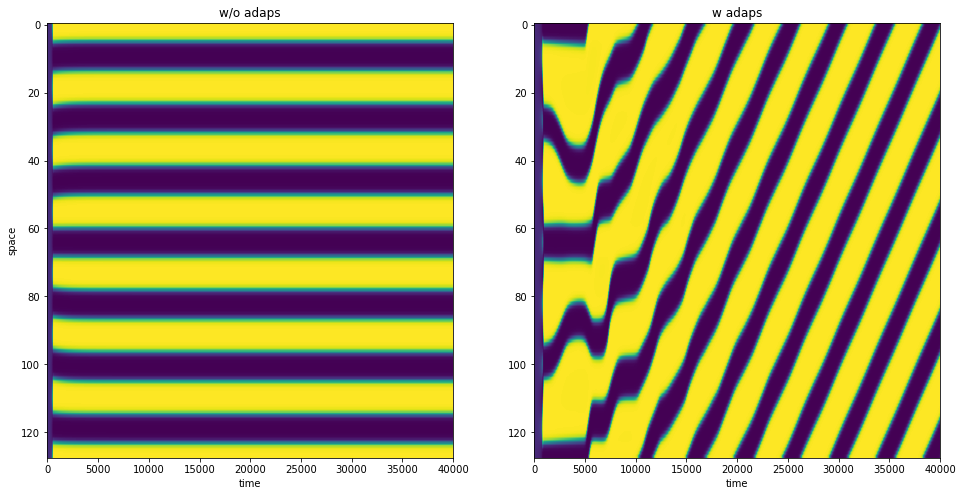

In [9]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,8))

ax0.imshow(ue.T, vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T, vmin=0, vmax=1, aspect='auto')

ax0.set_title(label='w/o adaps')
ax1.set_title(label='w adaps')


ax0.set_xlabel('time')
ax0.set_ylabel('space')

ax1.set_xlabel('time')